# Model Training

Import Data and Required Packages

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

#### Import csv data as pd dataframe

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math score'], axis=1)
X.shape

(1000, 7)

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [10]:
X.select_dtypes(include='object').columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [11]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
  [
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
  ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [16]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true , predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae,  rmse, r2_square

In [27]:
models = {
  "LinearRegression": LinearRegression(),
  "Lasso": Lasso(),
  "Ridge": Ridge(),
  "K-Neighbors Regression": KNeighborsRegressor(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest Regressor": RandomForestRegressor(),
  "XGBRegressor": XGBRegressor(),
  "CatBoostRegressor": CatBoostRegressor(),
  "AdaBoost Regressor": AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)          # train model 
  
  # Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  # Evaluate and test predictions
  model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
  
  
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  
  print("Model performance of the training set")
  print(f" - Root Mean Squared Error : {model_train_rmse:.4f}")
  print(f" - Mean Absolute error: {model_train_mae:.4f}")
  print(f" - R2 Score: { model_train_r2:.4f}")
  
  print("Model performance of the testing set")
  print(f" - Root Mean Squared Error : {model_test_rmse:.4f}")
  print(f" - Mean Absolute error: {model_test_mae:.4f}")
  print(f" - R2 Score: { model_test_r2:.4f}")
  r2_list.append(model_test_r2)
  
  print('='*35)
  print('\n')
  

LinearRegression
Model performance of the training set
 - Root Mean Squared Error : 5.3231
 - Mean Absolute error: 4.2667
 - R2 Score: 0.8743
Model performance of the testing set
 - Root Mean Squared Error : 5.3940
 - Mean Absolute error: 4.2148
 - R2 Score: 0.8804


Lasso
Model performance of the training set
 - Root Mean Squared Error : 6.5938
 - Mean Absolute error: 5.2063
 - R2 Score: 0.8071
Model performance of the testing set
 - Root Mean Squared Error : 6.5197
 - Mean Absolute error: 5.1579
 - R2 Score: 0.8253


Ridge
Model performance of the training set
 - Root Mean Squared Error : 5.3233
 - Mean Absolute error: 4.2650
 - R2 Score: 0.8743
Model performance of the testing set
 - Root Mean Squared Error : 5.3904
 - Mean Absolute error: 4.2111
 - R2 Score: 0.8806


K-Neighbors Regression
Model performance of the training set
 - Root Mean Squared Error : 5.7092
 - Mean Absolute error: 4.5180
 - R2 Score: 0.8554
Model performance of the testing set
 - Root Mean Squared Error : 7.25

### Results

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,Random Forest Regressor,0.853419
7,CatBoostRegressor,0.851632
8,AdaBoost Regressor,0.843641
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regression,0.783898
4,Decision Tree,0.747841


### Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the modelis %.2f" %score)

Accuracy of the modelis 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

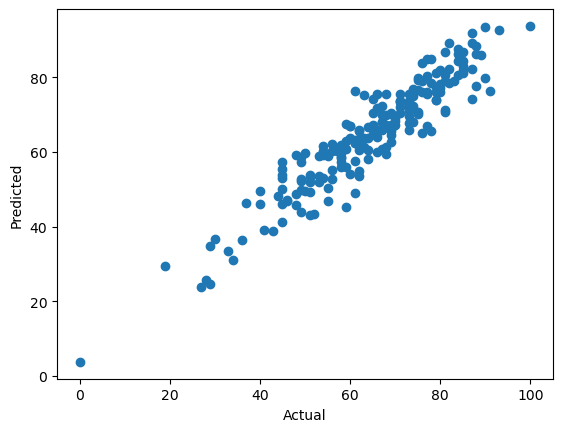

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

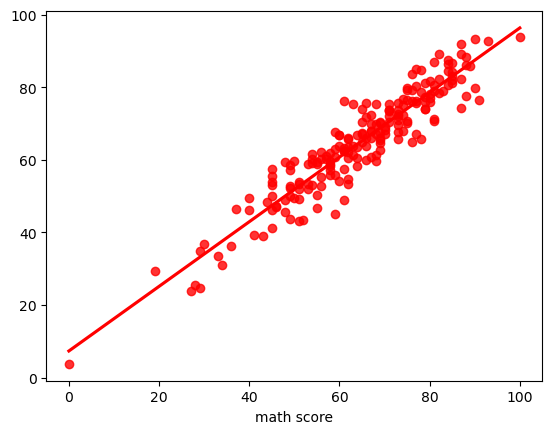

In [37]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='Red')

#### Difference between actual and predicted values

In [39]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
